In [ ]:
import pandas as pd
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\train.csv")
df

In [ ]:
df.isna().sum()

In [ ]:
df.drop(['PassengerId','Cabin','Name','SibSp','Parch','Embarked','Ticket'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
inputs=df.drop('Survived',axis=1)
target=df['Survived']
inputs

In [ ]:
inputs['Sex']=inputs['Sex'].map({'male':1,'female':0})
inputs

In [ ]:
def titanic_missing_age(columns):
    age=columns[0]
    passanger_class=columns[1]
    if pd.isnull(age):
        if passanger_class==1:
            return inputs[inputs['Pclass']==1]['Age'].mean()
        elif passanger_class==2:
            return inputs[inputs['Pclass']==2]['Age'].mean()
        else:
            return inputs[inputs['Pclass']==3]['Age'].mean()
    else:
        return age

In [ ]:
inputs['Age']=inputs[['Age','Pclass']].apply(titanic_missing_age,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
target.value_counts(normalize=True)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(inputs,target,random_state=101,test_size=0.2,stratify=target)

In [ ]:
ytrain.value_counts(normalize=True) # normalie=true to get percentage

In [ ]:
ytest.value_counts(normalize=True)

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)

In [ ]:
model.score(xtrain,ytrain)

In [ ]:
model.score(xtest,ytest)

In [ ]:
y_pred=model.predict_proba(xtest)[:,0]
y_pred

In [ ]:
pred=model.predict(xtest)
pred

In [ ]:
# to change the threshold value
new_t=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.7:
        new_t.append(1)
    else:
        new_t.append(0)
new_t

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,new_t)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
train_acc=[]
test_acc=[]
for i in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=i,random_state=50)
    dt_model.fit(xtrain,ytrain)
    train_acc.append(dt_model.score(xtrain,ytrain))
    test_acc.append(dt_model.score(xtest,ytest))

In [ ]:
frame=pd.DataFrame({'max_depth':range(1,10),'test_accuracy':test_acc,'train_accuracy':train_acc})
frame

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['test_accuracy'],marker='*')
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='*')
plt.xlabel('Depth of the tree')
plt.ylabel('Performance')
plt.legend(['test','train'])
plt.show()

### 

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
df.drop('Cabin',axis=1,inplace=True)

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
def titanic_missing_age(columns):
    age=columns[0]
    passanger_class=columns[1]
    if pd.isnull(age):
        if passanger_class==1:
            return df[df['Pclass']==1]['Age'].mean()
        elif passanger_class==2:
            return df[df['Pclass']==2]['Age'].mean()
        else:
            return df[df['Pclass']==3]['Age'].mean()
    else:
        return age

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


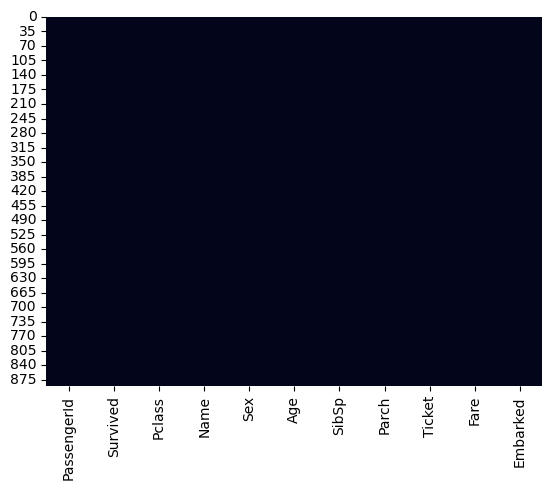

In [7]:
df['Age']=df[['Age','Pclass']].apply(titanic_missing_age,axis=1)
sns.heatmap(df.isnull(),cbar=False)
df.head()

In [8]:
sex_data=pd.get_dummies(df['Sex'],drop_first=True,dtype='int32')
embarked=pd.get_dummies(df['Embarked'],drop_first=True,dtype='int32')
sex_data

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [9]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# df.drop(['PassengerId','Name','Embarked','Ticket','Sex'],axis=1,inplace=True)
df.drop(['PassengerId','Name','Embarked','Ticket','Sex'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00000,1,0,7.2500
1,1,1,38.00000,1,0,71.2833
2,1,3,26.00000,0,0,7.9250
3,1,1,35.00000,1,0,53.1000
4,0,3,35.00000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000
887,1,1,19.00000,0,0,30.0000
888,0,3,25.14062,1,2,23.4500
889,1,1,26.00000,0,0,30.0000


In [12]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
df=pd.concat([df,sex_data,embarked],axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00000,1,0,7.2500,1,0,1
1,1,1,38.00000,1,0,71.2833,0,0,0
2,1,3,26.00000,0,0,7.9250,0,0,1
3,1,1,35.00000,1,0,53.1000,0,0,1
4,0,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,1,0,1
887,1,1,19.00000,0,0,30.0000,0,0,1
888,0,3,25.14062,1,2,23.4500,0,0,1
889,1,1,26.00000,0,0,30.0000,1,0,0


In [14]:
from sklearn.model_selection import KFold,train_test_split,GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
x=df.drop('Survived',axis=1)
y=df['Survived']
# x=df.drop('Survived',axis=1)
# y=df['Survived']
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [15]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)
depth_val=np.arange(2,11)
depth_val

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
lef_val=np.arange(1,31,step=9)
lef_val

array([ 1, 10, 19, 28])

In [19]:
grid_params=[{'max_depth':depth_val,'min_samples_leaf':lef_val}]
model=DecisionTreeClassifier(criterion='entropy')

In [20]:
grid_search=GridSearchCV(estimator=model,param_grid=grid_params,cv=KFold(n_splits=10))
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'min_samples_leaf': array([ 1, 10, 19, 28])}])

In [23]:
best_depth=grid_search.best_params_['max_depth']
best_min=grid_search.best_params_['min_samples_leaf']
best_depth

3

In [24]:
best_min

1

In [25]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=best_depth,min_samples_leaf=best_min)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
print('trainingacc',model.score(xtrain,ytrain))

trainingacc 0.8323353293413174


In [27]:
print(model.score(xtest,ytest))

0.8026905829596412
